Abdul Ghofur Rais Kumar |
submisson |
Belajar Machine Learning untuk Pemula


In [2]:
import tensorflow as tf
import zipfile
import os
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [1]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-04-10 08:46:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.10MB/s    in 43s     

2021-04-10 08:47:07 (7.14 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
#membuat callback untuk menghentikan training setelah akurasi terpenuhi
DESIRED_ACCURACY = 0.96

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nAkurasi telah mencapai 96%!')
            self.model.stop_training = True

callbacks = myCallback()

In [5]:
#membagi dataset
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)
val_rock = os.path.join(val_dir, 'rock')
os.mkdir(val_rock)
val_paper = os.path.join(val_dir, 'paper')
os.mkdir(val_paper)
val_scissors = os.path.join(val_dir, 'scissors')
os.mkdir(val_scissors)

In [7]:
#membagi dataset ke training dan validation directory
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40) #rock
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40) #paper
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40) #scissors

In [8]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [10]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()
model.compile(loss = 'categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=41, 
    validation_data = val_generator, 
    verbose = 2, 
    validation_steps=27,
    callbacks=[callbacks]
    )

Epoch 1/25
41/41 - 47s - loss: 1.0954 - accuracy: 0.3712 - val_loss: 1.0151 - val_accuracy: 0.4028
Epoch 2/25
41/41 - 14s - loss: 1.0144 - accuracy: 0.4832 - val_loss: 0.7403 - val_accuracy: 0.6389
Epoch 3/25
41/41 - 14s - loss: 0.7710 - accuracy: 0.6517 - val_loss: 0.2952 - val_accuracy: 0.9201
Epoch 4/25
41/41 - 14s - loss: 0.4974 - accuracy: 0.8034 - val_loss: 0.1740 - val_accuracy: 0.9560
Epoch 5/25
41/41 - 14s - loss: 0.3405 - accuracy: 0.8841 - val_loss: 0.1469 - val_accuracy: 0.9676
Epoch 6/25
41/41 - 14s - loss: 0.2796 - accuracy: 0.9101 - val_loss: 0.1007 - val_accuracy: 0.9722
Epoch 7/25
41/41 - 14s - loss: 0.2175 - accuracy: 0.9261 - val_loss: 0.1082 - val_accuracy: 0.9745
Epoch 8/25
41/41 - 14s - loss: 0.1994 - accuracy: 0.9383 - val_loss: 0.2449 - val_accuracy: 0.9225
Epoch 9/25
41/41 - 14s - loss: 0.2011 - accuracy: 0.9375 - val_loss: 0.1008 - val_accuracy: 0.9757
Epoch 10/25
41/41 - 14s - loss: 0.1420 - accuracy: 0.9527 - val_loss: 0.1031 - val_accuracy: 0.9664
Epoch 11/

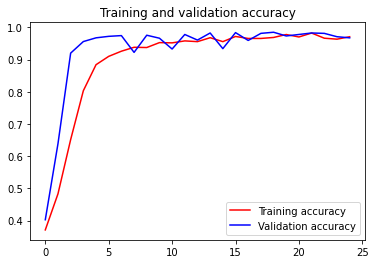

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 069467800_1483447177-topic_article_telapak_tangan_keringat.jpg to 069467800_1483447177-topic_article_telapak_tangan_keringat.jpg
069467800_1483447177-topic_article_telapak_tangan_keringat.jpg
paper


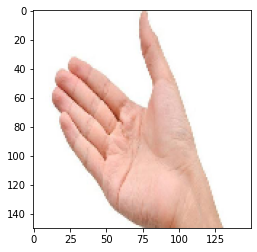

In [21]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')